In [4]:
import pandas as pd  
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

driver = webdriver.Chrome()

url = 'https://finance.vietstock.vn/ket-qua-giao-dich'
driver.get(url)

try:
    login_link = driver.find_element(By.XPATH, '//a[@class="title-link btnlogin-link"]')
    login_link.click()

    username_input = driver.find_element(By.XPATH, '//*[@id="txtEmailLogin"]')
    password_input = driver.find_element(By.XPATH, '//*[@id="txtPassword"]')

    username = "doankhoa126@gmail.com"
    password = "wolf2952001"

    username_input.send_keys(username)
    password_input.send_keys(password)

    login_button = driver.find_element(By.XPATH, '//*[@id="btnLoginAccount"]')
    login_button.click()

    time.sleep(5)

    data = [] 

    for loop_count in range(21):
        table = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/div[1]/div[17]/div[1]/div/div/div[3]/div/div/div[3]')))

        rows = table.find_elements(By.TAG_NAME, 'tr')

        for row in rows:
            cells = row.find_elements(By.TAG_NAME, 'td')
            row_data = [cell.text for cell in cells]
            data.append(row_data)

        try:
            next_button = WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.XPATH, '//*[@id="btn-page-next"]'))
            )
            driver.execute_script("arguments[0].click();", next_button)
        except:
            break

    df = pd.DataFrame(data)
    df = df.dropna(how='any')
    df.columns = ['STT', 'Date', 'Ticker', 'Reference', 'OpenPrice', 'ClosePrice', 'HighPrice', 'LowPrice', 'Average', 'ChangePlusMinus', 'ChangePercent', 'OrderMatchingTradingKL', 'OrderMatchingTradingGT', 'PutThroughTradingKL', 'PutThroughTradingGT', 'TotalTransactionsKL', 'TotalTransactionsGT', 'MarketCapitalization']

    print(df)

except Exception as e:
    print(f"Lỗi: {str(e)}")
finally:
    driver.quit()


     STT        Date Ticker Reference OpenPrice ClosePrice HighPrice LowPrice  \
2      1  22/09/2023    AAA     10.50     10.50      10.30     10.70    10.20   
3      2  22/09/2023    AAM     10.90     10.90      10.60     10.90    10.55   
4      3  22/09/2023    AAT      6.00      5.86       5.78      5.98     5.71   
5      4  22/09/2023    ABR     13.80     13.80      13.80     13.80    13.80   
6      5  22/09/2023    ABS      7.35      7.20       7.06      7.24     6.98   
..   ...         ...    ...       ...       ...        ...       ...      ...   
448  407  22/09/2023    VSI     18.00     17.10      17.10     17.10    17.10   
449  408  22/09/2023    VTB     10.85     10.80      10.65     10.85    10.65   
450  409  22/09/2023    VTO      9.84      9.50       9.70      9.86     9.50   
451  410  22/09/2023    YBM      7.42      7.00       7.40      7.40     7.00   
452  411  22/09/2023    YEG     13.10     12.50      12.80     13.10    12.50   

    Average ChangePlusMinus

In [27]:
import pandas as pd
import pyodbc
from sqlalchemy import create_engine


conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=MSI\\SQLEXPRESS;'
                      'Database=KLTN;'
                      'Trusted_Connection=yes;')


cursor = conn.cursor()

df = df.replace('-', 0)

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


columns_to_convert_to_float = ['OpenPrice', 'ClosePrice', 'HighPrice', 'LowPrice', 'ChangePlusMinus', 'ChangePercent', 'OrderMatchingTradingKL', 'OrderMatchingTradingGT', 'PutThroughTradingKL', 'PutThroughTradingGT', 'TotalTransactionsKL', 'TotalTransactionsGT', 'MarketCapitalization']

df[columns_to_convert_to_float] = df[columns_to_convert_to_float].astype(float)

for index, row in df.iterrows():
    cursor.execute("INSERT INTO KQGD (STT, Date, Ticker, Reference, OpenPrice, ClosePrice, HighPrice, LowPrice, Average, ChangePlusMinus, ChangePercent, OrderMatchingTradingKL, OrderMatchingTradingGT, PutThroughTradingKL, PutThroughTradingGT, TotalTransactionsKL, TotalTransactionsGT, MarketCapitalization) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)",
                   row['STT'], row['Date'], row['Ticker'], row['Reference'], row['OpenPrice'], row['ClosePrice'], row['HighPrice'], row['LowPrice'], row['Average'], row['ChangePlusMinus'], row['ChangePercent'], row['OrderMatchingTradingKL'], row['OrderMatchingTradingGT'], row['PutThroughTradingKL'], row['PutThroughTradingGT'], row['TotalTransactionsKL'], row['TotalTransactionsGT'], row['MarketCapitalization'])

conn.commit()
conn.close()


In [28]:
df

,STT,Date,Ticker,Reference,OpenPrice,ClosePrice,HighPrice,LowPrice,Average,ChangePlusMinus,ChangePercent,OrderMatchingTradingKL,OrderMatchingTradingGT,PutThroughTradingKL,PutThroughTradingGT,TotalTransactionsKL,TotalTransactionsGT,MarketCapitalization
2,1,2023-09-22,AAA,10.50,10.50,10.30,10.70,10.20,10.42,-200.0,-1.90,5785700.0,60285.0,0.0,0.0,5785700.0,60285.0,3937427.0
3,2,2023-09-22,AAM,10.90,10.90,10.60,10.90,10.55,10.59,-300.0,-2.75,18700.0,198.0,0.0,0.0,18700.0,198.0,110783.0
4,3,2023-09-22,AAT,6.00,5.86,5.78,5.98,5.71,5.81,-220.0,-3.67,465200.0,2701.0,0.0,0.0,465200.0,2701.0,409334.0
5,4,2023-09-22,ABR,13.80,13.80,13.80,13.80,13.80,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,276000.0
6,5,2023-09-22,ABS,7.35,7.20,7.06,7.24,6.98,7.08,-290.0,-3.95,1951400.0,13819.0,0.0,0.0,1951400.0,13819.0,564800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,407,2023-09-22,VSI,18.00,17.10,17.10,17.10,17.10,16.88,-900.0,-5.00,1600.0,27.0,0.0,0.0,1600.0,27.0,225720.0
449,408,2023-09-22,VTB,10.85,10.80,10.65,10.85,10.65,10.76,-200.0,-1.84,14500.0,156.0,0.0,0.0,14500.0,156.0,115068.0
450,409,2023-09-22,VTO,9.84,9.50,9.70,9.86,9.50,9.72,-140.0,-1.42,842300.0,8184.0,8.0,0.0,842308.0,8184.0,774707.0
451,410,2023-09-22,YBM,7.42,7.00,7.40,7.40,7.00,7.35,-20.0,-0.27,15100.0,111.0,0.0,0.0,15100.0,111.0,105819.0


<h2>S-CNN-LUCAS</h2>

In [40]:
import pandas as pd
import numpy as np
import time
from keras.models import Sequential
from keras.layers import Dense,RepeatVector,Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [55]:
import warnings

warnings.filterwarnings("ignore")

In [56]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=MSI\\SQLEXPRESS;'
                      'Database=KLTN;'
                      'Trusted_Connection=yes;')

sql_query = f"SELECT [Date], [Ticker], [ClosePrice] FROM [KLTN].[dbo].[KQGD] WHERE [Ticker] = 'VCB'"

df = pd.read_sql_query(sql_query, conn)

conn.close()

print(df)


         Date Ticker  ClosePrice
0  2023-09-22    VCB        89.3


In [57]:
data= df

In [58]:
data = data.tail(1000)
data = data.filter(['ClosePrice'])


In [59]:
#Tiền xử lý
data.fillna(0, inplace=True)

# Normalize data
scaler = MinMaxScaler()
dataScale = scaler.fit_transform(data.values.reshape(-1,1))

In [60]:
# Hàm tính giá trị alpha tối ưu
def optimum_alpha(X):
    X_max = np.max(X)
    X_min = np.min(X)
    n = len(X)
    return ((X_max - X_min) - (1/n) * np.sum(X)) / (X_max - X_min)


In [61]:
def smoothed(X, alpha):
    S = np.zeros_like(X)
    S[0] = X[0]
    for i in range(1, len(X)):
        S[i] = S[i-1] + alpha*(X[i] - S[i-1])
    return S

In [62]:
alpha = optimum_alpha(dataScale)


In [63]:
S = smoothed(dataScale, alpha)
print("Giá trị alpha tối ưu:", alpha)
print("Chuỗi ban đầu:", dataScale)
print("Chuỗi đã được làm mịn:", S)


Giá trị alpha tối ưu: nan
Chuỗi ban đầu: [[0.]]
Chuỗi đã được làm mịn: [[0.]]


Text(0.5, 1.0, 'Smooth')

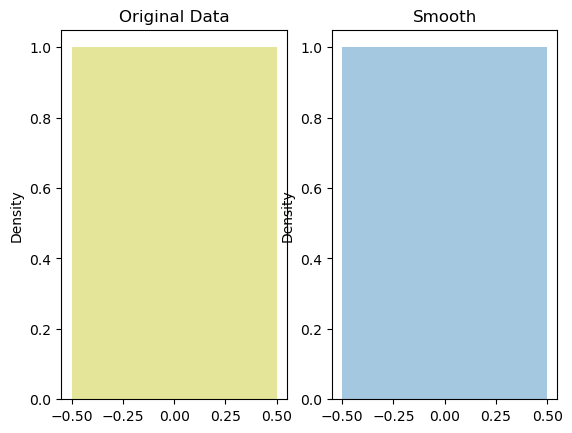

In [64]:
import seaborn as sns

fig, ax=plt.subplots(1,2)
sns.distplot(dataScale, ax=ax[0], color='y')
ax[0].set_title("Original Data")


sns.distplot(S,ax=ax[1])
ax[1].set_title("Smooth")


In [65]:
#Chia dữ liệu thành train test
data = pd.DataFrame(S)

#dataScale = data
train_percent = 0.8
train_size = int(len(data) * train_percent)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [53]:
#Chuẩn bị dữ liệu để đưa vào mô hình
def prepare_data(data, size_window,size_predict,stepWindow):
    X, y = [], []
    startWindow = 0
    for i in range(len(data) - size_window - 1):
        if (len(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0]) != size_predict):
            break
        X.append(data[startWindow:(startWindow + size_window), :])
        y.append(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0])
          
       
        startWindow += stepWindow
    return np.array(X), np.array(y)


size_window = 7
size_predict = 1
stepWindow = 1
X_train, y_train = prepare_data(train_data.values, size_window, size_predict, stepWindow)
X_test, y_test = prepare_data(test_data.values, size_window, size_predict, stepWindow)

In [54]:
start_time = time.time()

In [ ]:
lucas_list =[3, 4, 7, 11, 18, 29, 47, 76]
lucas_number = lucas_list[1]

In [ ]:

# Tạo mô hình CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(size_window, 1)))
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
for i in range(lucas_number):
    model.add(Dense(units=100, activation='relu')) 
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

# Compile mô hình với Adam optimizer và Mean Squared Error loss
model.compile(loss='mse', optimizer='adam')


In [ ]:
history = model.fit(X_train, y_train, epochs=8000, batch_size=8)

In [ ]:
y_pred = model.predict(X_test)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")